In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Ruta de la carpeta donde se encuentran los archivos CSV
folder_path = 'datos_limpios'

# Lista de nombres de archivos CSV para las temporadas 2016/2017 hasta 2022/2023
file_names = [f'{folder_path}/champions_{year}_{year+1}.csv' for year in range(2016, 2023)]

# Leer cada archivo CSV y almacenar los DataFrames en una lista
dfs = [pd.read_csv(file, delimiter=',') for file in file_names]

# Concatenar los DataFrames en uno solo
df_all = pd.concat(dfs, ignore_index=True)

In [4]:
df_all

,SEASON,HOME_TEAM,AWAY_TEAM,HT_SCORE,AW_SCORE
0,2016,FC Basel,PFC Ludogorets Razgrad,1,1
1,2016,Paris Saint-Germain,Arsenal FC,1,1
2,2016,Arsenal FC,FC Basel,2,0
3,2016,PFC Ludogorets Razgrad,Paris Saint-Germain,1,3
4,2016,Arsenal FC,PFC Ludogorets Razgrad,6,0
...,...,...,...,...,...
864,2022,Paris Saint-Germain,Juventus,2,1
865,2022,RB Salzburg,AC Milan,1,1
866,2022,Celtic FC,Real Madrid,0,3
867,2022,Dinamo Zagreb,Chelsea FC,1,0


In [6]:
#estadisticas generales
partidos_totales = df_all.shape[0]
equipos_totales = pd.concat([df_all['HOME_TEAM'], df_all['AWAY_TEAM']]).nunique()

print(f'Partidos totales: {partidos_totales}')
print(f'Equipos totales: {equipos_totales}')

Partidos totales: 869
Equipos totales: 78


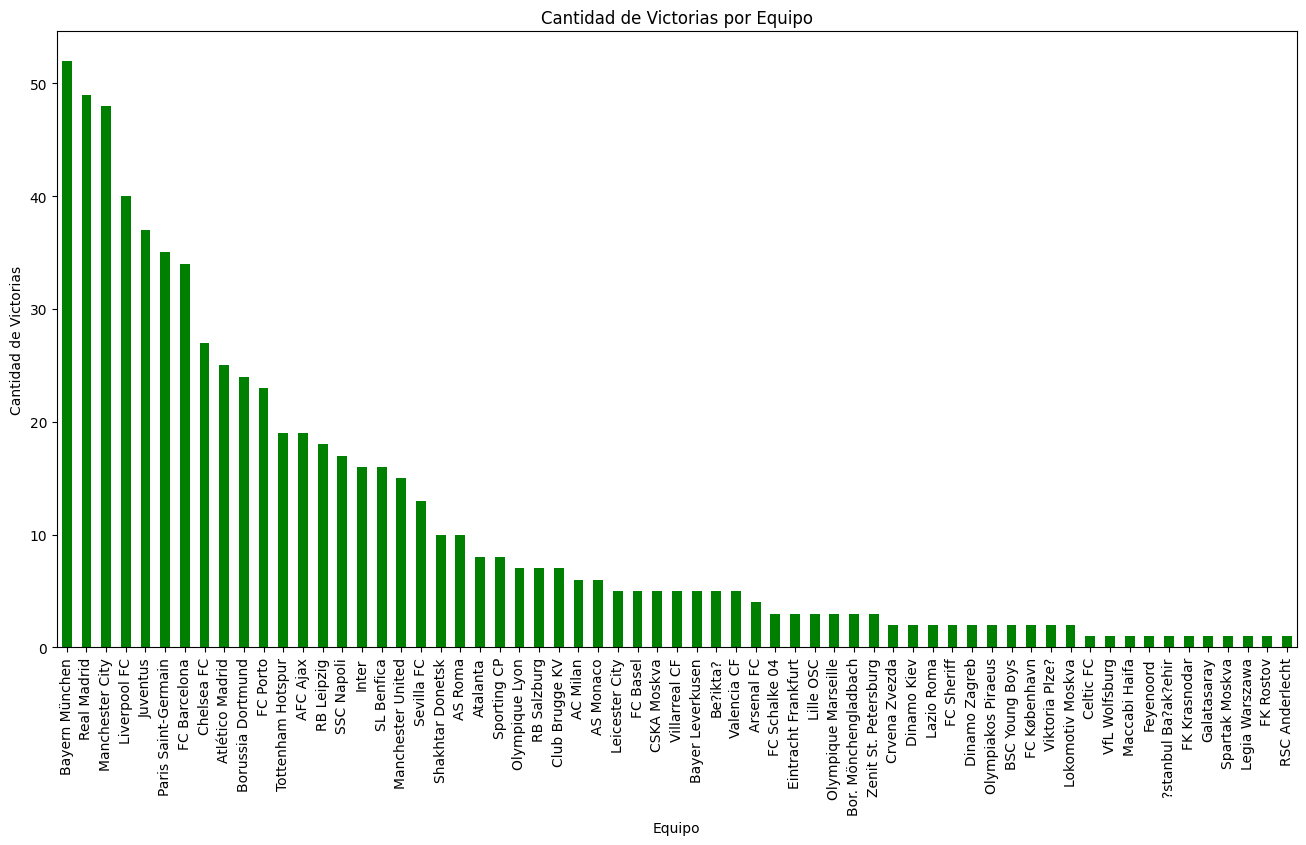

In [7]:
#Grafico de barras para cantidad de victorias por equipo
plt.figure(figsize=(16, 8))
victorias = pd.concat([df_all['HOME_TEAM'][df_all['HT_SCORE'] > df_all['AW_SCORE']], df_all['AWAY_TEAM'][df_all['HT_SCORE'] < df_all['AW_SCORE']]]).value_counts()
victorias.plot(kind='bar', color='green')
plt.title('Cantidad de Victorias por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Victorias')
plt.show()

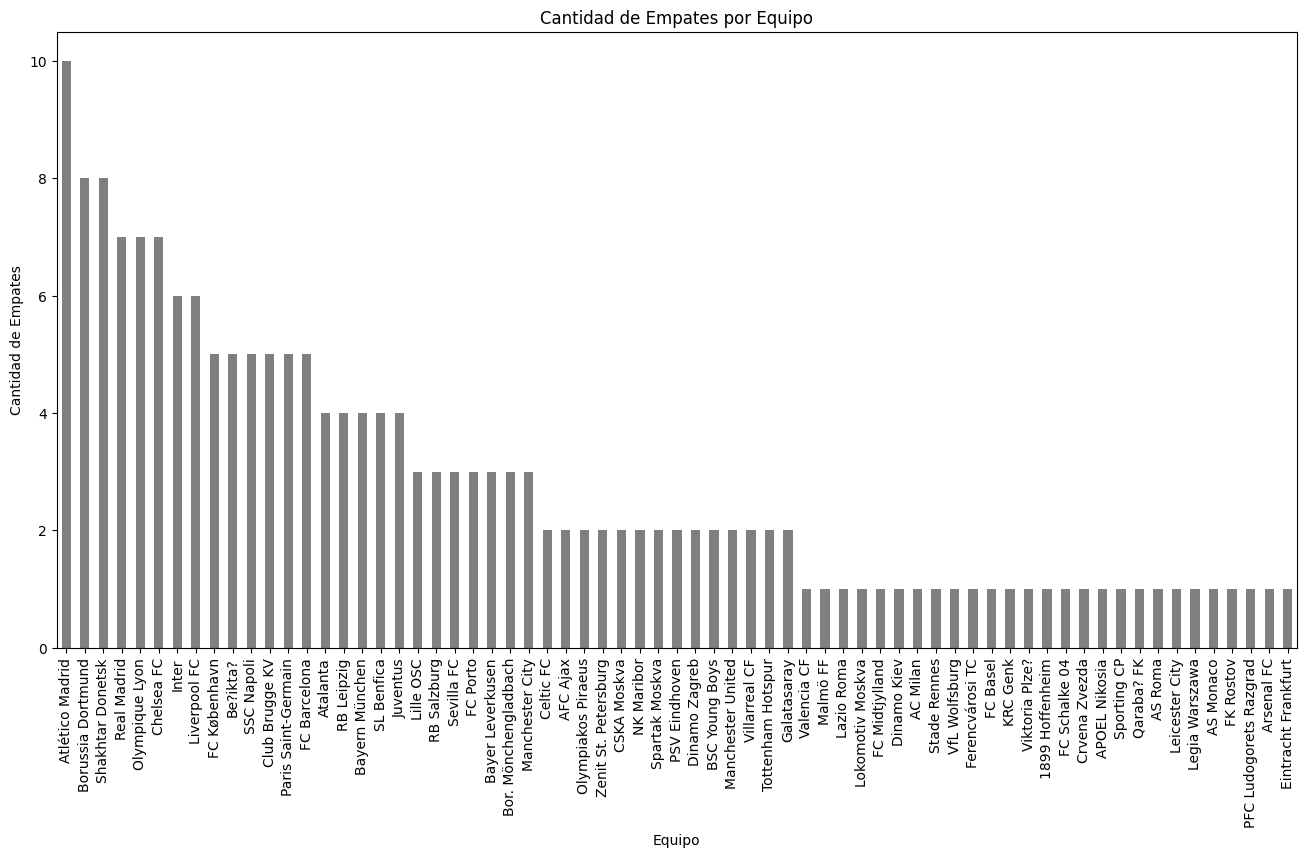

In [8]:
#Grafico de barras para cantidad de empates por equipo
plt.figure(figsize=(16, 8))
empates = df_all[df_all['HT_SCORE'] == df_all['AW_SCORE']]['HOME_TEAM'].value_counts()
empates.plot(kind='bar', color='gray')
plt.title('Cantidad de Empates por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Empates')
plt.show()

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


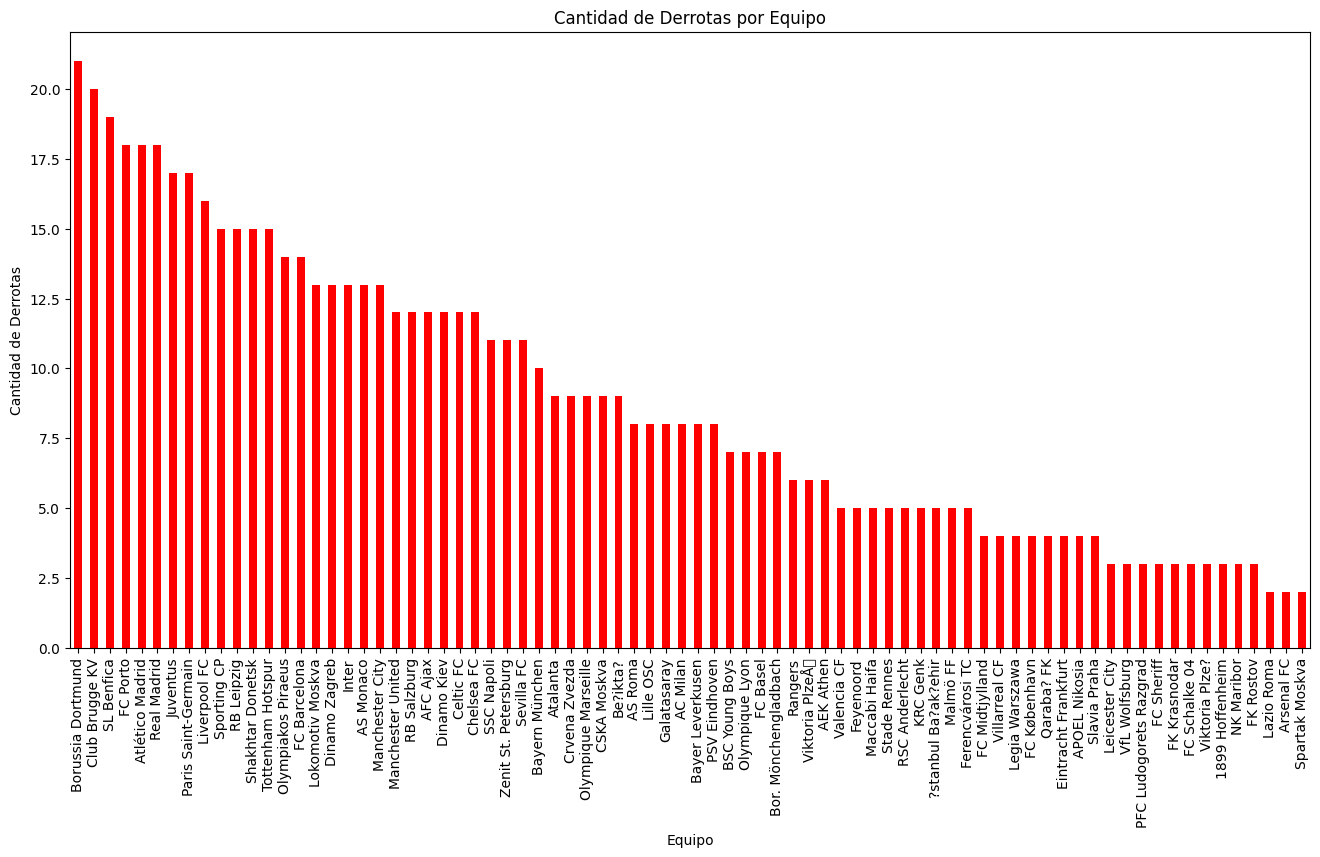

In [9]:
#grafico de barras para cantidad de derrotas por equipo
plt.figure(figsize=(16, 8))
derrotas = pd.concat([df_all['HOME_TEAM'][df_all['HT_SCORE'] < df_all['AW_SCORE']], df_all['AWAY_TEAM'][df_all['HT_SCORE'] > df_all['AW_SCORE']]]).value_counts()
derrotas.plot(kind='bar', color='red')
plt.title('Cantidad de Derrotas por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Derrotas')
plt.show()

Media de goles por partido: 3.05


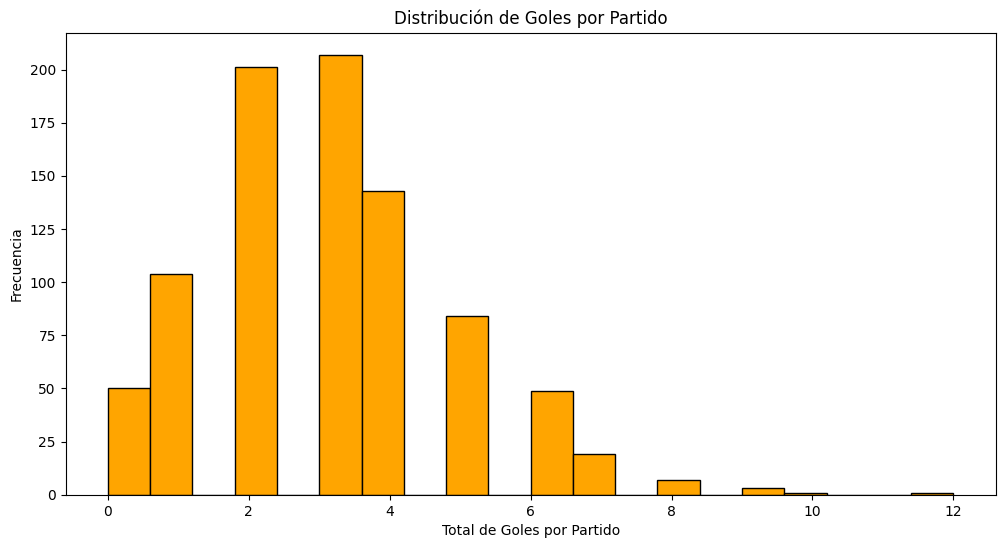

In [12]:
#analisis de goles por partido
df_all['Goles Totales'] = df_all['HT_SCORE'] + df_all['AW_SCORE']
media_goles_partido = df_all['Goles Totales'].mean()

print(f"Media de goles por partido: {media_goles_partido:.2f}")

plt.figure(figsize=(12, 6))
df_all['Goles Totales'].plot(kind='hist', bins=20, color='orange', edgecolor='black')
plt.title('Distribución de Goles por Partido')
plt.xlabel('Total de Goles por Partido')
plt.ylabel('Frecuencia')
plt.show()

In [16]:

# Rendimiento de equipos en casa y fuera
victorias_locales = df_all[df_all['HT_SCORE'] > df_all['AW_SCORE']]['HOME_TEAM'].value_counts()
victorias_visitantes = df_all[df_all['HT_SCORE'] < df_all['AW_SCORE']]['AWAY_TEAM'].value_counts()
empates_locales = df_all[df_all['HT_SCORE'] == df_all['AW_SCORE']]['HOME_TEAM'].value_counts()
empates_visitantes = df_all[df_all['HT_SCORE'] == df_all['AW_SCORE']]['AWAY_TEAM'].value_counts()
derrotas_locales = df_all[df_all['HT_SCORE'] < df_all['AW_SCORE']]['HOME_TEAM'].value_counts()
derrotas_visitantes = df_all[df_all['HT_SCORE'] > df_all['AW_SCORE']]['AWAY_TEAM'].value_counts()



# Crear un DataFrame con los datos
df_rendimiento = pd.DataFrame({
    'Victorias Locales': victorias_locales,
    'Victorias Visitantes': victorias_visitantes,
    'Empates Locales': empates_locales,
    'Empates Visitantes': empates_visitantes,
    'Derrotas Locales': derrotas_locales,
    'Derrotas Visitantes': derrotas_visitantes
})


df_rendimiento['Victorias Totales'] = df_rendimiento['Victorias Locales'] + df_rendimiento['Victorias Visitantes']
df_rendimiento['Empates Totales'] = df_rendimiento['Empates Locales'] + df_rendimiento['Empates Visitantes']
df_rendimiento['Derrotas Totales'] = df_rendimiento['Derrotas Locales'] + df_rendimiento['Derrotas Visitantes']

df_rendimiento['Partidos Totales'] = df_rendimiento['Victorias Totales'] + df_rendimiento['Empates Totales'] + df_rendimiento['Derrotas Totales']
df_rendimiento['Porcentage Victoria'] = (df_rendimiento['Victorias Totales'] / df_rendimiento['Partidos Totales']) * 100
df_rendimiento['Porcentage Empate'] = (df_rendimiento['Empates Totales'] / df_rendimiento['Partidos Totales']) * 100
df_rendimiento['Porcentage Derrota'] = (df_rendimiento['Derrotas Totales'] / df_rendimiento['Partidos Totales']) * 100

df_rendimiento.sort_values(by='Porcentage Victoria', ascending=False, inplace=True)

print('Rendimiento de equipos:')
df_rendimiento.head(20)

Rendimiento de equipos:


,Victorias Locales,Victorias Visitantes,Empates Locales,Empates Visitantes,Derrotas Locales,Derrotas Visitantes,Victorias Totales,Empates Totales,Derrotas Totales,Partidos Totales,Porcentage Victoria,Porcentage Empate,Porcentage Derrota
Bayern München,26.0,26.0,4.0,5.0,4.0,6,52.0,9.0,10.0,71.0,73.239437,12.676056,14.084507
Manchester City,31.0,17.0,3.0,11.0,5.0,8,48.0,14.0,13.0,75.0,64.000000,18.666667,17.333333
Real Madrid,25.0,24.0,7.0,5.0,7.0,11,49.0,12.0,18.0,79.0,62.025316,15.189873,22.784810
Liverpool FC,21.0,19.0,6.0,3.0,5.0,11,40.0,9.0,16.0,65.0,61.538462,13.846154,24.615385
Juventus,20.0,17.0,4.0,5.0,8.0,9,37.0,9.0,17.0,63.0,58.730159,14.285714,26.984127
FC Barcelona,21.0,13.0,5.0,8.0,5.0,9,34.0,13.0,14.0,61.0,55.737705,21.311475,22.950820
Paris Saint-Germain,19.0,16.0,5.0,6.0,7.0,10,35.0,11.0,17.0,63.0,55.555556,17.460317,26.984127
Chelsea FC,12.0,15.0,7.0,3.0,5.0,7,27.0,10.0,12.0,49.0,55.102041,20.408163,24.489796
AS Roma,8.0,2.0,1.0,1.0,1.0,7,10.0,2.0,8.0,20.0,50.000000,10.000000,40.000000
Arsenal FC,2.0,2.0,1.0,1.0,1.0,1,4.0,2.0,2.0,8.0,50.000000,25.000000,25.000000


C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


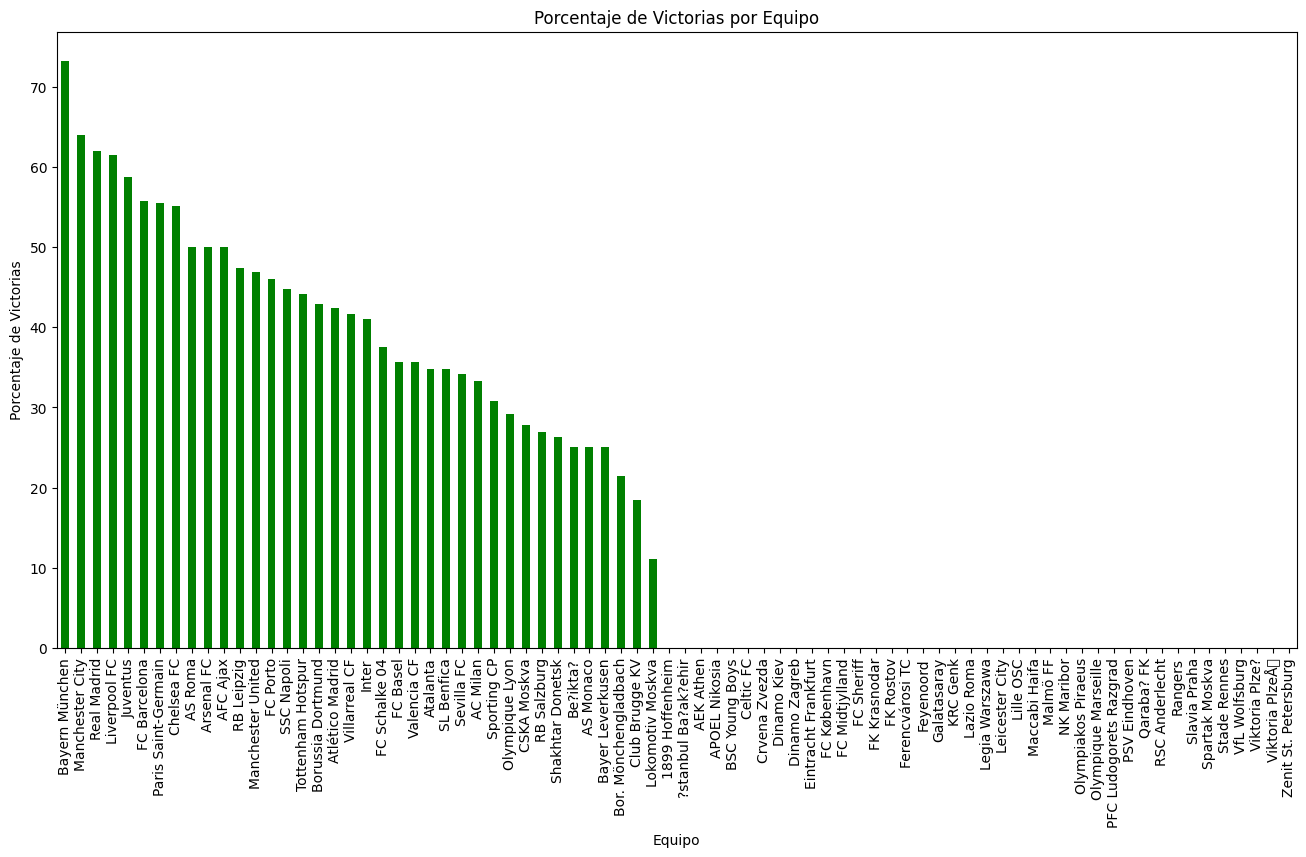

In [17]:
#Grafico de barras para el porcentaje de victorias
plt.figure(figsize=(16, 8))
df_rendimiento['Porcentage Victoria'].plot(kind='bar', color='green')
plt.title('Porcentaje de Victorias por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Victorias')
plt.show()

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


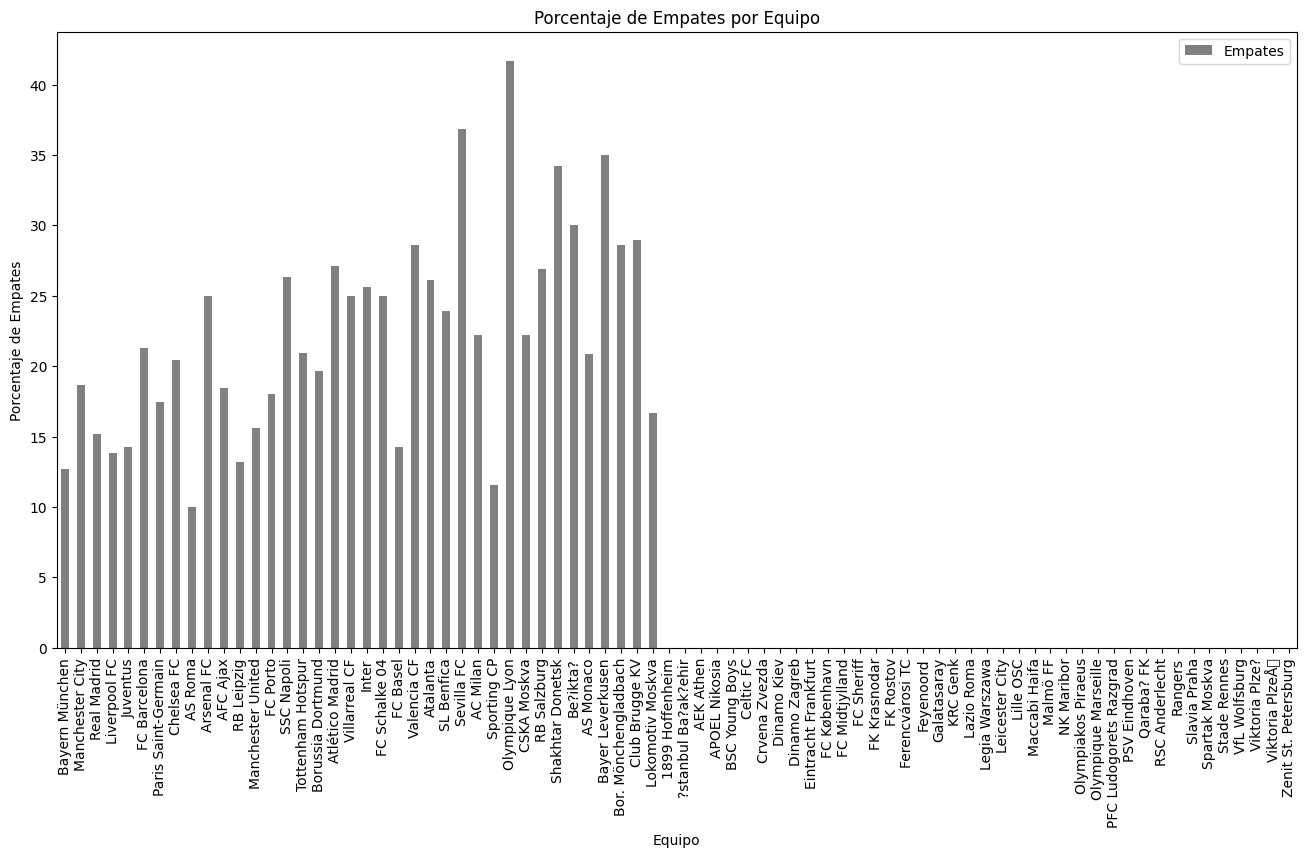

In [18]:
#Grafico de barras para el porcentaje de empates
plt.figure(figsize=(16, 8))
df_rendimiento['Porcentage Empate'].plot(kind='bar', color='gray')
plt.title('Porcentaje de Empates por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Empates')
plt.legend(['Empates'])
plt.show()

C:\Users\alvde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


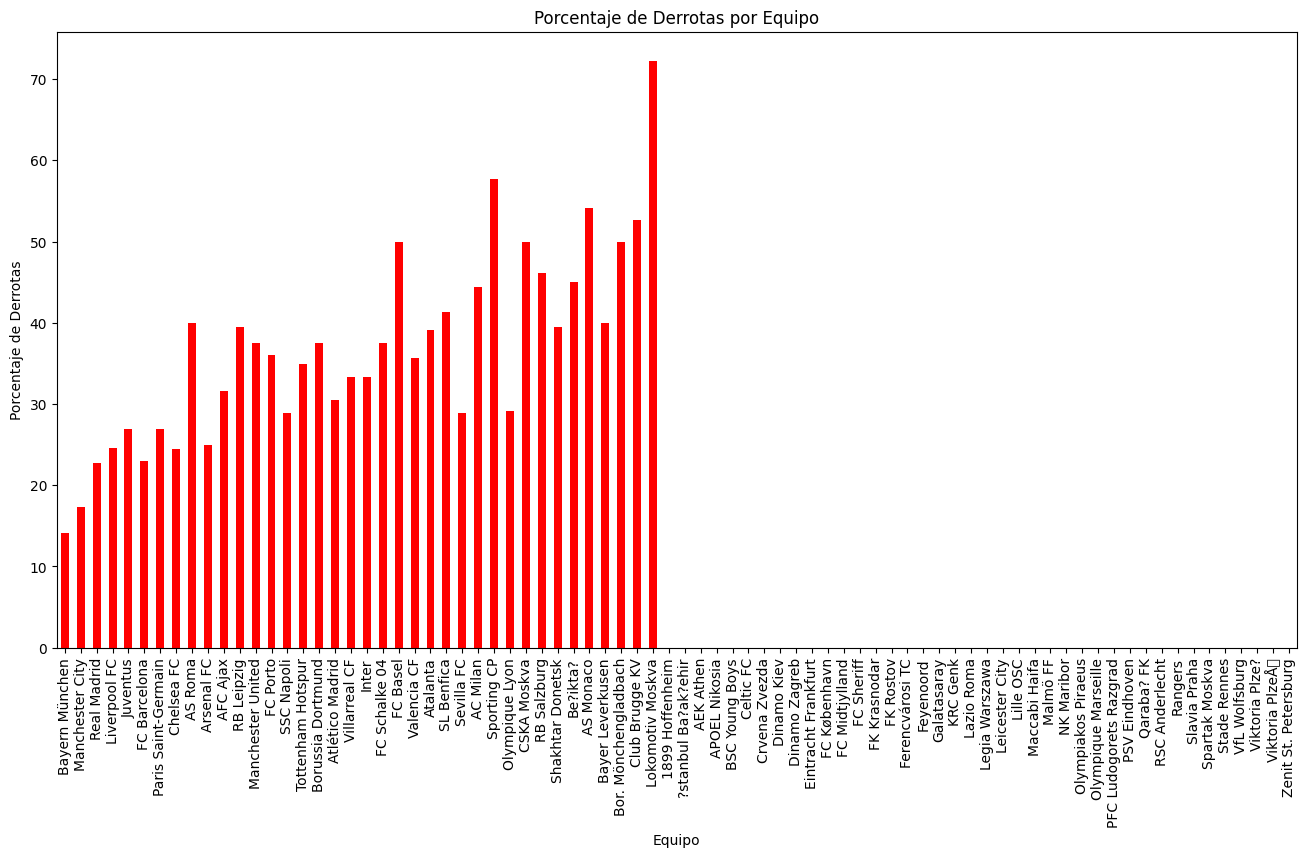

In [19]:
#Grafico de barras para el porcentaje de derrotas
plt.figure(figsize=(16, 8))
df_rendimiento['Porcentage Derrota'].plot(kind='bar', color='red')
plt.title('Porcentaje de Derrotas por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Derrotas')
plt.show()
